<a href="https://colab.research.google.com/github/aysegulucar2016/ML_ReadingGroup/blob/master/2__log_likelihood_c3_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 0.5559
R-Squared (R²): 0.5758


(array([3.45483332e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.90966664e-04, 2.07289999e-03, 8.29159996e-03,
        1.00535650e-01, 6.64364447e-01, 4.35308998e-01, 1.38193333e-01,
        4.45673498e-02, 2.34928666e-02, 6.56418330e-03, 1.72741666e-03]),
 array([-9.87533103, -9.17414506, -8.4729591 , -7.77177314, -7.07058718,
        -6.36940122, -5.66821526, -4.9670293 , -4.26584334, -3.56465738,
        -2.86347142, -2.16228545, -1.46109949, -0.75991353, -0.05872757,
         0.64245839,  1.34364435,  2.04483031,  2.74601627,  3.44720223,
         4.1483882 ]),
 <BarContainer object of 20 artists>)

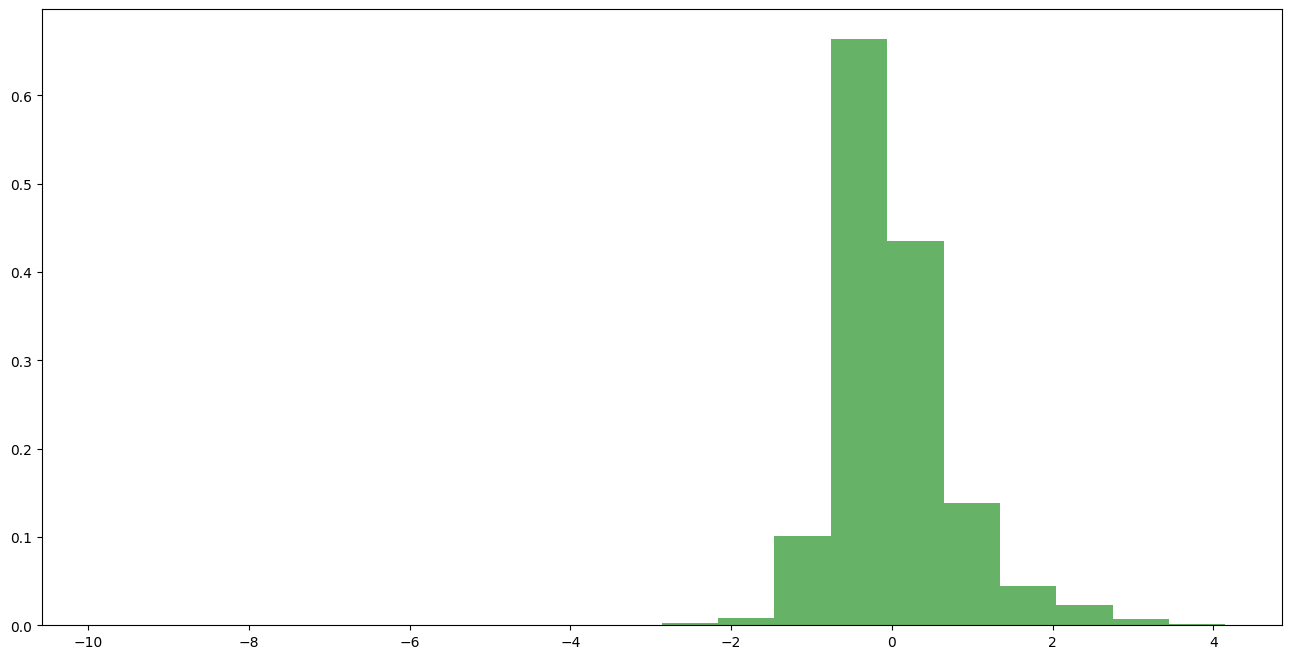

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm, laplace, t, cauchy, logistic, kstest, gaussian_kde, probplot

# California Housing data set uploading
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # Taget variable (House prise)

# Feature and target assigning
X = df.drop(columns=['Target'])  # Dependent variables
y = df['Target']  #  Independent variables

# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)
errors = y_test - y_pred  # Error

# Model predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# Histogram and Density Plots
plt.figure(figsize=(16, 8))

# Histogram
plt.hist(errors, bins=20, density=True, alpha=0.6, color='g', label="Error Histogram")

Normal the distribution parameters: (0.0034792979037561603, 0.7455732647978609)
Laplace the distribution parameters: (-0.1224393287350104, 0.5232313175322714)
Student-T the distribution parameters: (3.2402710050328105, -0.10616685428200445, 0.4899663878324402)
Cauchy the distribution parameters: (-0.16208646847499403, 0.34578836212705116)
Logistic the distribution parameters: (-0.0651890900705459, 0.3794271092888298)


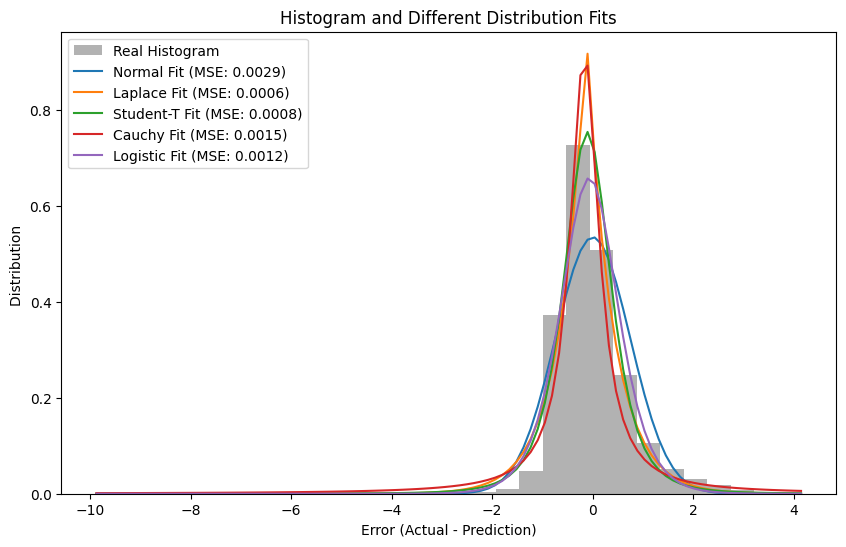

In [ ]:
# Distributions to be used
distributions = {
    "Normal": norm,
    "Laplace": laplace,
    "Student-T": t,
    "Cauchy": cauchy,
    "Logistic": logistic
}

# Obtain the histogram data (real data distribution)
hist_vals, bin_edges = np.histogram(errors, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Bin center points

# Calculate MSE to determine the best distribution
mse_scores = {}
distribution_params = {}

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, density=True, alpha=0.6, color='gray', label="Real Histogram")

x = np.linspace(min(errors), max(errors), 100)

for name, dist in distributions.items():
    params = dist.fit(errors)  # Find the parameters that best fit the distribution to the error data
    pdf_fitted = dist.pdf(bin_centers, *params)  # Calculate the PDF (at bin centers).

    # Calculate the difference between the histogram and PDF (Mean Squared Error - MSE).
    mse = np.mean((hist_vals - pdf_fitted) ** 2)
    mse_scores[name] = mse
    distribution_params[name] = params

    plt.plot(x, dist.pdf(x, *params), label=f"{name} Fit (MSE: {mse:.4f})")
    # Print the distribution parameters.
    print(f"{name} the distribution parameters: {params}")

plt.xlabel("Error (Actual - Prediction)")
plt.ylabel("Distribution ")
plt.title("Histogram and Different Distribution Fits")
plt.legend()
plt.show()


In [ ]:
# Select the distribution with the lowest MSE value
best_fit = min(mse_scores, key=mse_scores.get)

print("\n ---*Histogram Fit Results (Comparison with MSE):---")
for name, mse in mse_scores.items():
    print(f" {name} distribution - MSE: {mse:.6f} - Parameters: {distribution_params[name]}")

print(f"\n ---The best-fitting distribution to the histogram:--- {best_fit}")
print(f" Mean Squared Error (MSE) değeri: {mse_scores[best_fit]:.6f}")
print(f" Parametreler: {distribution_params[best_fit]}")



 ---*Histogram Fit Results (Comparison with MSE):---
 Normal distribution - MSE: 0.002917 - Parameters: (0.0034792979037561603, 0.7455732647978609)
 Laplace distribution - MSE: 0.000621 - Parameters: (-0.1224393287350104, 0.5232313175322714)
 Student-T distribution - MSE: 0.000794 - Parameters: (3.2402710050328105, -0.10616685428200445, 0.4899663878324402)
 Cauchy distribution - MSE: 0.001499 - Parameters: (-0.16208646847499403, 0.34578836212705116)
 Logistic distribution - MSE: 0.001210 - Parameters: (-0.0651890900705459, 0.3794271092888298)

 ---The best-fitting distribution to the histogram:--- Laplace
 Mean Squared Error (MSE) değeri: 0.000621
 Parametreler: (-0.1224393287350104, 0.5232313175322714)


In [ ]:
# Suggested Loss Function
loss_mapping = {
    "Normal": "Mean Squared Error (MSE)",
    "Laplace": "Mean Absolute Error (MAE)",
    "Student-T": "t-Distribution Loss or Huber Loss",
    "Cauchy": "Cauchy Loss (for heavy-tailed data)",
    "Logistic": "Log-Cosh Loss"
}

print(f"\n Suggested Loss Function: {loss_mapping.get(best_fit, 'MSE')}")


 Suggested Loss Function: Mean Absolute Error (MAE)
